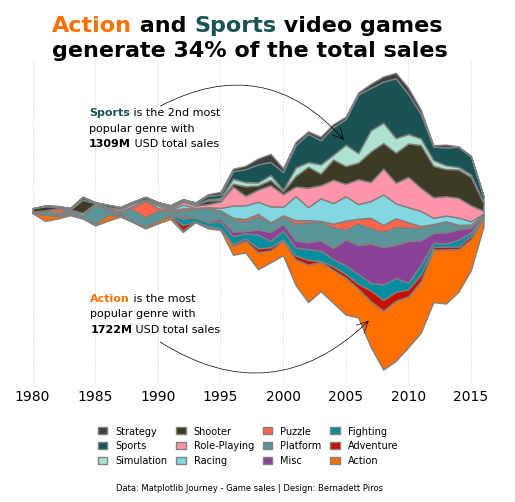

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from drawarrow import ax_arrow, fig_arrow
from pypalettes import load_cmap
from highlight_text import ax_text, fig_text

url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/game-sales/game-sales.csv"
df = pd.read_csv(url)

agg_df=df.groupby(["Genre"], as_index=False)["Global_Sales"].sum().sort_values(by="Global_Sales", ascending=False).reset_index().drop(["index"], axis=1)

value_action = agg_df.iloc[0, 1].astype(int)
value_sports = agg_df.iloc[1, 1].astype(int)

grouped_df = df.groupby(["Year", "Genre"])["Global_Sales"].sum().reset_index()

wide_df = grouped_df.pivot(index="Year", columns="Genre", values="Global_Sales").fillna(0)

x = wide_df.index.values
y1 = wide_df['Action']
y2 = wide_df['Adventure']
y3 = wide_df['Fighting']
y4 = wide_df['Misc']
y5 = wide_df['Platform']
y6 = wide_df['Puzzle']
y7 = wide_df['Racing']
y8 = wide_df['Role-Playing']
y9 = wide_df['Shooter']
y10 = wide_df['Simulation']
y11 = wide_df['Sports']
y12 = wide_df['Strategy']

cmap = load_cmap("planetexpress_futurama")

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.2)

ax.stackplot(
   x, y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12,
   labels=wide_df.columns,
   colors=cmap.colors,
   edgecolor='grey',
   linewidth=1,
   baseline='wiggle'
)

for i in range(1980, 2020, 5):
    ax.axvline(i, color='grey', lw=0.5, ls="dotted", alpha=0.5, zorder=-3)

ax.legend(ncols=4, columnspacing=0.9, frameon=False, reverse=True,
          fontsize=7, handlelength=1, bbox_to_anchor=(0.8, -0.1))

ax.tick_params(length=0)
ax.spines[["top", "bottom", "left", "right"]].set_visible(False)

text_style=dict(size=8, ha="right") 
ax_text(1995, -190, s=f"<Action> is the most\npopular genre with\n<{value_action}M> USD total sales",
        **text_style, highlight_textprops=[
           {"color": cmap(0), "weight":"bold"},
            {"weight":"bold"}]
)
ax_text(1995, 240, s=f"<Sports> is the 2nd most\npopular genre with\n<{value_sports}M> USD total sales",
        **text_style, highlight_textprops=[
           {"color": cmap(10), "weight":"bold"},
            {"weight":"bold"}]
)

ax_arrow([1990, 240], [2005, 160], fill_head=False,
         radius=-0.4, width=0.5, ax=ax)

ax_arrow([1990, -300], [2007, -250], fill_head=False,
         radius=0.4, width=0.5, ax=ax)

fig_text(0.5, 0.97, s="<Action> and <Sports> video games\ngenerate 34% of the total sales",
         fontsize=16, weight="bold", ha="center", 
         highlight_textprops=[
            {"color": cmap(0), "weight":"bold"},
            {"color": cmap(10), "weight":"bold"}]           
)

plt.yticks([])

fig.text(0.5, -0.02, "Data: Matplotlib Journey - Game sales | Design: Bernadett Piros",
         size=6, ha="center")

plt.show()

#plt.savefig("stream__game_sales", dpi=300, bbox_inches='tight', pad_inches=0.2)